In [ ]:
import pandas as pd

df = pd.read_csv('lead_scoring_cleaned.csv')
converted = df[df['Converted'] == 1]
not_converted = df[df['Converted']==0]

  Visit Range  Leads  Converted  Not Converted  Conversion Ratio
3   1501-2000    575        411            164             71.48
2   1001-1500   1528       1053            475             68.91
4       2000+     22         15              7             68.18
1    501-1000   1042        599            443             57.49
0       0-500   6073       1483           4590             24.42


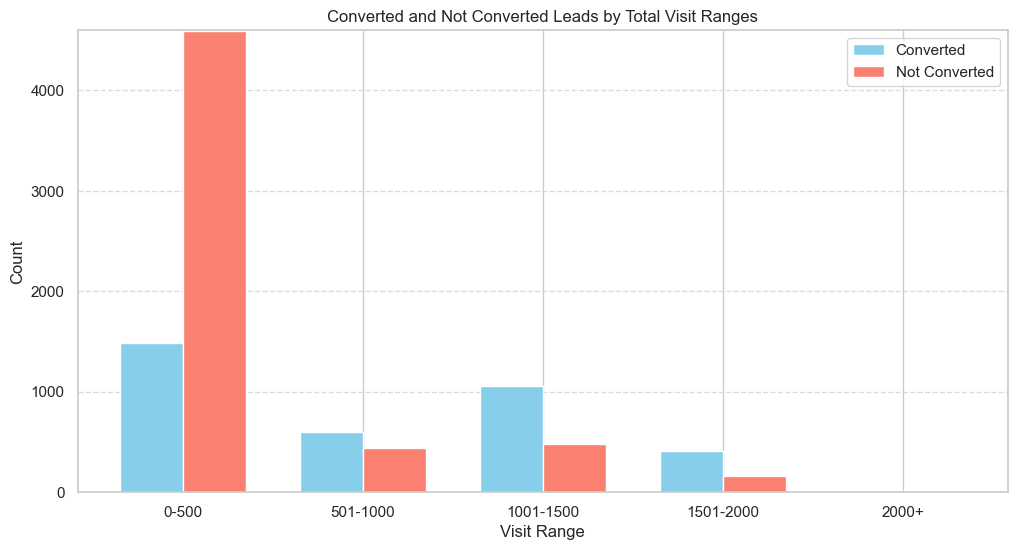

In [32]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Load your dataset
df = pd.read_csv('lead_scoring_cleaned.csv')

# Step 3: Check the unique values in the TotalVisits column
# print("Unique TotalVisits values:", df['TotalVisits'].unique())

# Step 4: Define visit ranges as specified
bins = [0, 501, 1001, 1501, 2001, float('inf')]  # Define the ranges
labels = ['0-500', '501-1000', '1001-1500', '1501-2000', '2000+']  # Labels for the ranges

# Step 5: Create a new column for visit ranges
df['Visit Range'] = pd.cut(df['Total Time Spent on Website'], bins=bins, labels=labels, right=False)

# print(df['Visit Range'])

# Step 6: Initialize a dictionary to hold the summary data
summary_data = {}

# Step 7: Calculate the summary for each visit range
for val in labels:  # Iterate over the defined labels to ensure all ranges are included
    converted_sum = df[df['Visit Range'] == val]['Converted'].sum()  # Sum of converted leads
    total_leads = df[df['Visit Range'] == val]['Converted'].count()  # Total leads in the range
    not_converted = total_leads - converted_sum  # Calculate not converted leads
    conversion_ratio = round(converted_sum / total_leads * 100, 2) if total_leads > 0 else 0  # Conversion ratio
    summary_data[val] = [total_leads, converted_sum, not_converted, conversion_ratio]  # Store in dictionary

# Step 8: Create a DataFrame from the summary data
summary_df = pd.DataFrame.from_dict(summary_data, orient='index', 
                                     columns=['Leads', 'Converted', 'Not Converted', 'Conversion Ratio'])

# Step 9: Reset index for plotting
summary_df.reset_index(inplace=True)
summary_df.rename(columns={'index': 'Visit Range'}, inplace=True)

# Sort the DataFrame by Conversion Ratio in descending order
summary_df_sorted = summary_df.sort_values(by='Conversion Ratio', ascending=False)

# Step 10: Print the summary DataFrame to check the counts
print(summary_df_sorted)

# Step 11: Plotting the grouped bar chart
plt.figure(figsize=(12, 6))  # Set the figure size
bar_width = 0.35  # Width of the bars
x = range(len(summary_df))  # X locations for the groups

# Step 12: Create bars for converted and not converted
plt.bar(x, summary_df['Converted'], width=bar_width, label='Converted', color='skyblue')  # Converted leads
plt.bar([p + bar_width for p in x], summary_df['Not Converted'], width=bar_width, label='Not Converted', color='salmon')  # Not converted leads

# Step 13: Adding labels and title
plt.title('Converted and Not Converted Leads by Total Visit Ranges')  # Title of the plot
plt.xlabel('Visit Range')  # X-axis label
plt.ylabel('Count')  # Y-axis label
plt.xticks([p + bar_width / 2 for p in x], summary_df['Visit Range'])  # Center the x-ticks
plt.legend()  # Show legend
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines
plt.ylim(0, summary_df[['Converted', 'Not Converted']].max().max() + 10)  # Set y-axis limit for better visibility
plt.show()  # Display the plot

  Time Spent Range  Leads  Converted  Not Converted  Conversion Ratio
3        1501-2000    575        411            164             71.48
2        1001-1500   1528       1053            475             68.91
4            2000+     22         15              7             68.18
1         501-1000   1042        599            443             57.49
0            0-500   6073       1483           4590             24.42


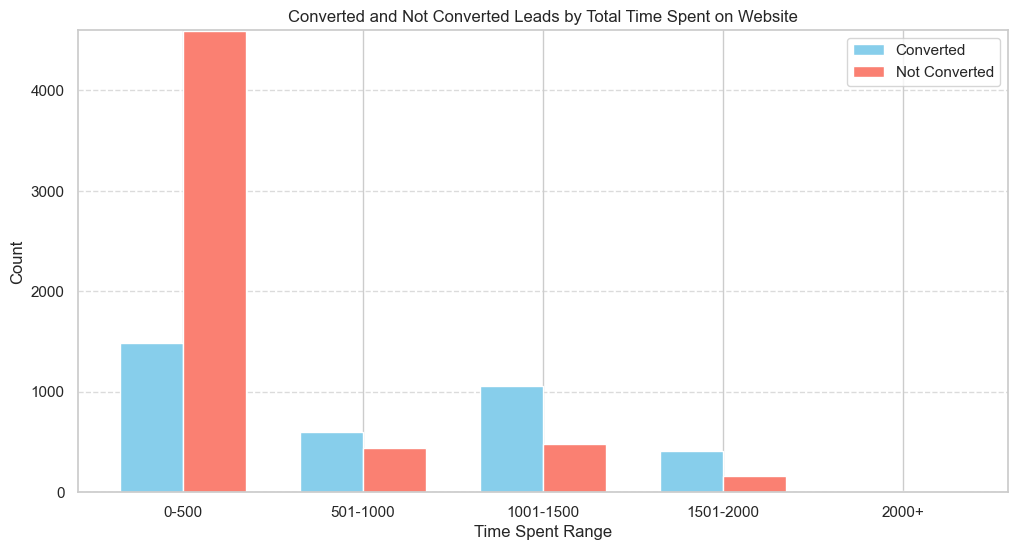

In [27]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Load your dataset
df = pd.read_csv('lead_scoring_cleaned.csv')

# Step 3: Check the unique values in the Total Time Spent on Website column
# print("Unique Total Time Spent on Website values:", df['Total Time Spent on Website'].unique())

# Step 4: Define time spent ranges as specified
bins = [0, 501, 1001, 1501, 2001, float('inf')]  # Define the ranges
labels = ['0-500', '501-1000', '1001-1500', '1501-2000', '2000+']  # Labels for the ranges

# Step 5: Create a new column for time spent ranges
df['Time Spent Range'] = pd.cut(df['Total Time Spent on Website'], bins=bins, labels=labels, right=False)

# Step 6: Initialize a dictionary to hold the summary data
summary_data = {}

# Step 7: Calculate the summary for each time spent range
for val in labels:  # Iterate over the defined labels to ensure all ranges are included
    converted_sum = df[df['Time Spent Range'] == val]['Converted'].sum()  # Sum of converted leads
    total_leads = df[df['Time Spent Range'] == val]['Converted'].count()  # Total leads in the range
    not_converted = total_leads - converted_sum  # Calculate not converted leads
    conversion_ratio = round(converted_sum / total_leads * 100, 2) if total_leads > 0 else 0  # Conversion ratio
    summary_data[val] = [total_leads, converted_sum, not_converted, conversion_ratio]  # Store in dictionary

# Step 8: Create a DataFrame from the summary data
summary_df = pd.DataFrame.from_dict(summary_data, orient='index', 
                                     columns=['Leads', 'Converted', 'Not Converted', 'Conversion Ratio'])

# Step 9: Reset index for plotting
summary_df.reset_index(inplace=True)
summary_df.rename(columns={'index': 'Time Spent Range'}, inplace=True)

# Sort the DataFrame by Conversion Ratio in descending order
summary_df_sorted = summary_df.sort_values(by='Conversion Ratio', ascending=False)

# Step 10: Print the summary DataFrame to check the counts
print(summary_df_sorted)

# Step 11: Plotting the grouped bar chart
plt.figure(figsize=(12, 6))  # Set the figure size
bar_width = 0.35  # Width of the bars
x = range(len(summary_df))  # X locations for the groups

# Step 12: Create bars for converted and not converted
plt.bar(x, summary_df['Converted'], width=bar_width, label='Converted', color='skyblue')  # Converted leads
plt.bar([p + bar_width for p in x], summary_df['Not Converted'], width=bar_width, label='Not Converted', color='salmon')  # Not converted leads

# Step 13: Adding labels and title
plt.title('Converted and Not Converted Leads by Total Time Spent on Website')  # Title of the plot
plt.xlabel('Time Spent Range')  # X-axis label
plt.ylabel('Count')  # Y-axis label
plt.xticks([p + bar_width / 2 for p in x], summary_df['Time Spent Range'])  # Center the x-ticks
plt.legend()  # Show legend
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines
plt.ylim(0, summary_df[['Converted', 'Not Converted']].max().max() + 10)  # Set y-axis limit for better visibility
plt.show()  # Display the plot

In [28]:
import pandas as pd

# Load your dataset
df = pd.read_csv('lead_scoring_cleaned.csv')

# Check unique values in the "Total Time Spent on Website" column
print("Unique Total Time Spent on Website values:", df['Total Time Spent on Website'].unique())

# Define visit ranges as specified
bins = [0, 501, 1001, 1501, 2001, float('inf')]  # Define the ranges
labels = ['0-500', '501-1000', '1001-1500', '1501-2000', '2000+']  # Labels for the ranges

# Create a new column for visit ranges
df['Total Time Spent'] = pd.cut(df['Total Time Spent on Website'], bins=bins, labels=labels, right=False)

# Initialize a dictionary to hold the summary data
summary_data = {}

# Calculate the summary for each visit range
for val in labels:  # Iterate over the defined labels to ensure all ranges are included
    converted_sum = df[df['Visit Range'] == val]['Converted'].sum()  # Sum of converted leads
    total_leads = df[df['Visit Range'] == val]['Converted'].count()  # Total leads in the range
    not_converted = total_leads - converted_sum  # Calculate not converted leads
    conversion_ratio = round(converted_sum / total_leads * 100, 2) if total_leads > 0 else 0  # Conversion ratio
    summary_data[val] = [total_leads, converted_sum, not_converted, conversion_ratio]  # Store in dictionary

# Create a DataFrame from the summary data
summary_df = pd.DataFrame.from_dict(summary_data, orient='index', 
                                     columns=['Leads', 'Converted', 'Not Converted', 'Conversion Ratio'])

# Reset index for better readability
summary_df.reset_index(inplace=True)
summary_df.rename(columns={'index': 'Total Time Spent'}, inplace=True)

# Sort the DataFrame by Conversion Ratio in descending order
summary_df_sorted = summary_df.sort_values(by='Conversion Ratio', ascending=False)

# Print the sorted summary DataFrame
print(summary_df_sorted)

Unique Total Time Spent on Website values: [   0  674 1532 ...  603  483  927]


KeyError: 'Visit Range'

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# 1. Histogram of Conversion Probabilities
plt.figure(figsize=(10, 6))
sns.histplot(not_converted['Conversion Probability'], bins=30, kde=True)
plt.axvline(x=threshold, color='red', linestyle='--', label='Threshold')
plt.title('Distribution of Conversion Probabilities for Non-Converted Customers')
plt.xlabel('Conversion Probability')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# 2. Bar Plot of Key Features
# Assuming 'TotalVisits' and 'TotalTimeSpentOnWebsite' are key features
key_features = ['TotalVisits', 'TotalTimeSpentOnWebsite']
potential_converts_avg = potential_converts[key_features].mean()
non_converted_avg = not_converted[key_features].mean()

# Create a DataFrame for plotting
comparison_df = pd.DataFrame({
    'Potential Converts': potential_converts_avg,
    'Non-Converted': non_converted_avg
})

comparison_df.plot(kind='bar', figsize=(10, 6))
plt.title('Average Key Features for Potential Converts vs Non-Converted Customers')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.show()

# 3. Scatter Plot of Two Features
plt.figure(figsize=(10, 6))
sns.scatterplot(data=non_converted, x='TotalVisits', y='TotalTimeSpentOnWebsite', 
                hue='Conversion Probability', palette='viridis', size='Conversion Probability', sizes=(20, 200))
plt.title('Scatter Plot of Total Visits vs Total Time Spent on Website')
plt.xlabel('Total Visits')
plt.ylabel('Total Time Spent on Website')
plt.colorbar(label='Conversion Probability')
plt.show()

KeyError: 'Conversion Probability'

<Figure size 1000x600 with 0 Axes>